In [1]:
pip install rdkit


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from collections import Counter
from difflib import SequenceMatcher
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import re

try:
    from rdkit import Chem
    from rdkit.Chem import Descriptors
    RDKit_AVAILABLE = True
    print("RDKit найден")
except ImportError:
    RDKit_AVAILABLE = False
    Chem = None
    Descriptors = None
    print("RDKit не найден")

RDKit найден


In [5]:
TRAINING_PEPTIDES = {}

TRAINING_PEPTIDES["glycerol"] = [
    "cyclo(-H-I-E-Y-A-M-M-D-H-H-D-A-M-Y-E-I-H-M-)",
    "cyclo(-I-L-S-D-E-Y-D-W-K-W-I-A-E-F-)",
    "cyclo(-A-E-F-I-W-W-K-Y-D-E-F-G-P-Y-Q-I-D-D-P-N-)",
    "cyclo(-K-E-Y-I-N-P-M-I-A-D-H-Y-)",
    "cyclo(-P-S-R-D-P-R-Y-E-K-L-D-R-R-)",
    "cyclo(-H-E-Q-E-E-Y-H-E-Q-)",
    "cyclo(-K-K-E-H-Q-V-D-E-H-E-E-Q-E-H-E-Q-)",
    "cyclo(-T-Y-R-H-H-N-R-R-Q-E-)",
    "cyclo(-P-T-L-A-T-H-H-T-Y-)",
    "cyclo(-A-D-K-N-Q-N-K-Q-A-D-)",
    "cyclo(-Q-Y-Y-L-H-S-V-S-T-D-A-K-W-Q-W-R-H-H-T-A-I-A-V-N-F-D-E-)",
    "cyclo(-P-N-Y-R-R-F-P-S-Q-P-)",
    "cyclo(-R-H-T-A-F-F-G-G-I-Q-)",
    "cyclo(-R-D-S-S-L-R-L-H-L-D-T-H-R-D-R-T-A-A-S-A-L-D-P-)",
    "cyclo(-M-Y-P-D-G-L-R-T-D-K-K-V-V-V-Q-Q-T-R-L-G-D-P-Y-M-D-)",
    "cyclo(-M-Y-P-D-G-L-R-T-D-K-V-V-V-Q-Q-)",
    "cyclo(-M-Q-V-V-V-K-Q-I-N-D-T-R-L-G-D-P-Y-M-T-Q-P-V-V-Q-Q-Q-)",
    "cyclo(-W-A-Y-F-E-R-K-T-F-A-N-P-R-Q-Q-I-G-L-A-G-)",
    "cyclo(-A-D-K-N-Q-N-K-Q-A-D-)",
    "cyclo(-N-A-N-E-S-D-A-G-A-S-K-W-)",
    "cyclo(-R-E-Y-Y-S-Y-H-H-L-N-E-W-S-Q-)",
    "cyclo(-R-T-D-D-D-R-C-A-A-D-H-D-V-P-F-W-)",
    "cyclo(-R-A-E-W-S-R-N-W-Q-L-)",
    "cyclo(-V-Y-K-S-D-K-W-H-Y-F-P-V-T-P-L-Q-K-I-T-K-W-R-H-G-K-S-)",
    "cyclo(-V-E-A-D-L-T-F-C-E-G-S-T-G-C-S-D-S-S-I-)",
    "cyclo(-L-D-I-S-K-R-F-L-A-K-Y-W-Y-A-D-)",
    "cyclo(-P-E-V-Q-S-V-L-M-A-R-K-)",
    "cyclo(-I-W-K-Q-Q-P-V-K-R-)",
    "cyclo(-T-Q-R-E-W-Y-F-Q-D-T-Q-R-E-W-Y-F-Q-D-)",
    "cyclo(-P-E-S-D-L-S-Q-E-I-K-G-Y-Y-D-D-S-N-K-E-E-K-)",
    "cyclo(-E-P-Y-S-M-V-R-D-A-G-Y-K-N-S-D-I-V-K-R-)",
    "cyclo(-Q-S-E-E-K-E-K-E-V-T-E-R-)",
    "cyclo(-A-V-A-G-D-N-N-D-A-G-V-)",
    "cyclo(-F-I-P-G-T-Y-F-G-K-M-A-M-L-L-G-S-L-W-Y-K-T-R-)",
    "cyclo(-R-L-E-V-S-T-Y-S-N-S-R-)",
    "cyclo(-S-G-A-S-W-F-Y-Y-S-G-A-S-W-F-)",
    "cyclo(-D-L-D-L-R-Y-Q-K-H-T-V-E-)",
    "cyclo(-P-E-I-V-N-F-D-E-K-S-K-)",
    "cyclo(-L-L-F-Y-L-Y-R-D-R-)",
    "cyclo(-T-E-M-E-R-H-E-M-E-T-E-M-E-T-H-R-E-M-E-T-R-H-T-E-M-E-)",
    "cyclo(-R-H-T-K-L-T-E-N-R-R-S-Q-D-)",
    "cyclo(-R-H-T-K-N-T-E-T-R-R-S-D-)",
    "cyclo(-N-R-G-T-Y-F-Y-M-G-S-K-Y-F-G-M-Y-S-Y-K-A-D-L-G-E-P-K-K-L-)",
    "cyclo(-S-V-W-T-W-P-L-L-S-D-A-S-W-L-)",
    "cyclo(-I-V-I-L-Y-K-G-D-K-H-P-E-Y-L-T-Q-E-F-R-T-Y-F-W-I-V-I-L-Y-)",
    "cyclo(-I-V-Y-L-L-I-V-Y-D-I-)",
    "cyclo(-V-P-P-N-Y-L-I-V-Y-K-F-)",
    "cyclo(-I-P-Y-L-P-N-V-P-F-K-V-Y-)",
    "cyclo(-L-C-K-Y-L-D-T-P-W-Y-)",
    "cyclo(-S-G-W-N-F-S-D-E-T-)",
    "cyclo(-E-G-Q-L-R-E-R-L-L-S-D-E-A-L-D-)",
    "cyclo(-H-C-C-C-A-V-P-R-T-R-T-K-Q-Y-P-V-A-C-C-C-H-Q-)",
    "cyclo(-H-C-C-C-A-V-P-Q-R-R-Y-P-V-A-C-C-C-H-)",
    "cyclo(-L-E-W-A-T-W-G-N-K-E-Q-N-H-)",
    "cyclo(-V-P-R-Y-G-R-R-F-W-A-W-S-V-F-A-W-R-R-Y-G-R-V-P-)",
    "cyclo(-C-S-A-E-W-G-R-W-V-Y-K-E-D-H-H-R-K-E-)",
    "cyclo(-W-H-R-V-V-W-H-D-R-H-)",
    "cyclo(-K-L-S-N-R-D-Q-L-H-L-V-R-N-Q-D-H-R-K-L-W-Y-Q-Q-A-A-S-)",
    "cyclo(-M-L-K-D-W-L-Y-V-W-P-T-E-R-)",
    "cyclo(-E-K-S-C-K-N-A-E-H-D-Y-D-M-G-V-G-K-F-Y-K-G-G-N-)",
    "cyclo(-E-P-P-E-Y-H-T-R-D-N-C-S-Y-P-I-C-)",
    "cyclo(-R-G-N-E-A-K-E-R-L-W-S-I-E-A-G-F-E-K-R-L-E-R-G-N-E-A-)",
    "cyclo(-R-A-T-P-Y-I-E-Y-W-K-)",
    "cyclo(-I-I-I-Q-K-K-E-V-N-E-)",
    "cyclo(-H-M-Y-L-W-F-Y-R-G-E-A-R-)",
    "cyclo(-G-F-N-W-D-L-R-N-E-R-Q-)",
    "cyclo(-H-F-W-T-P-L-L-E-F-G-)",
    "cyclo(-F-K-N-K-A-P-L-Q-S-D-K-N-G-L-G-P-W-Q-E-L-S-)",
    "cyclo(-W-Q-N-M-F-R-H-E-K-P-Y-K-H-G-)",
    "cyclo(-D-K-F-E-R-E-S-D-E-Q-)",
    "cyclo(-H-N-V-L-M-Y-P-D-G-L-R-T-D-K-G-E-K-T-P-V-L-H-G-V-H-)",
    "cyclo(-N-H-S-R-R-H-I-N-R-)",
    "cyclo(-R-E-R-Y-I-E-W-R-D-R-Y-D-N-K-I-)",
    "cyclo(-Y-L-Y-R-T-F-V-V-V-V-F-L-L-Y-Y-)",
    "cyclo(-L-P-W-G-G-E-Y-Y-A-F-Y-R-V-G-K-)",
    "cyclo(-Y-H-H-W-R-P-V-M-R-F-L-Y-L-H-Y-)",
    "cyclo(-P-A-A-L-G-S-A-T-R-Y-)",
    "cyclo(-P-L-D-V-V-E-G-H-G-V-P-T-E-L-P-V-L-E-L-T-)",
    "cyclo(-F-N-L-K-T-K-S-K-D-K-Y-Y-V-D-T-S-T-K-S-E-F-N-C-R-)",
    "cyclo(-G-F-D-Y-L-V-N-N-V-W-W-Y-D-V-N-N-F-G-L-)",
    "cyclo(-W-I-K-E-D-Y-N-L-F-I-K-E-W-Y-D-N-L-F-)",
    "cyclo(-F-F-S-T-R-R-P-R-L-P-)",
    "cyclo(-Y-W-L-N-I-F-D-N-S-Y-W-V-D-R-C-H-L-D-K-G-R-K-)",
    "cyclo(-K-G-M-D-E-Y-N-D-K-K-Y-)",
    "cyclo(-V-S-L-V-P-K-Q-Q-Y-T-R-E-K-P-)",
    "cyclo(-Q-K-S-A-F-R-N-H-G-I-)",
    "cyclo(-A-D-Q-Q-R-L-N-D-Y-W-I-K-E-F-)",
    "cyclo(-H-E-G-A-I-G-G-V-A-W-I-D-V-A-G-A-G-R-M-L-A-R-R-D-)",
    "cyclo(-E-F-I-R-R-K-K-T-H-F-I-F-Y-F-Y-)",
    "cyclo(-F-P-L-L-S-M-E-R-M-S-L-L-P-F-E-R-N-)",
    "cyclo(-H-P-M-G-F-T-V-A-E-L-)",
    "cyclo(-K-L-S-D-I-H-Y-I-S-S-S-D-R-T-V-E-)",
    "cyclo(-L-A-G-A-L-P-N-S-T-V-I-Q-N-)",
    "cyclo(-G-D-D-S-I-S-R-T-T-V-M-)",
    "cyclo(-Q-D-T-F-S-Q-T-D-Q-F-S-Q-)",
    "cyclo(-E-L-H-R-F-I-V-K-H-A-S-G-)",
    "cyclo(-M-H-H-M-N-E-E-E-K-E-E-K-K-E-N-)",
    "cyclo(-M-H-H-M-N-E-E-E-K-E-E-K-K-E-N-)",
    "cyclo(-R-H-T-S-D-L-S-Q-N-S-S-G-)",
    "cyclo(-K-L-Y-T-H-S-Q-V-D-Y-E-D-A-K-M-D-W-Q-)",
    "cyclo(-R-P-S-L-Y-D-V-W-Q-S-P-H-T-S-Q-V-D-H-N-E-)",
    "cyclo(-H-H-K-D-R-S-E-S-P-I-Y-W-E-L-H-K-H-L-S-S-H-K-)",
    "cyclo(-S-N-D-F-P-E-G-A-N-E-D-)",
    "cyclo(-W-H-R-W-V-W-V-R-H-)",
    "cyclo(-R-I-G-D-Y-R-K-N-Y-F-R-W-E-W-R-)",
    "cyclo(-L-K-C-G-K-D-E-Q-Q-R-N-P-H-R-G-V-Q-Q-Y-K-E-F-T-F-S-G-E-P-)",
    "cyclo(-L-K-C-G-K-D-E-Q-Q-R-N-P-H-R-G-V-Q-Q-Y-K-E-F-T-F-S-G-E-P-)",
    "cyclo(-N-P-H-K-E-H-V-P-F-S-G-E-T-C-R-L-H-)",
    "cyclo(-L-K-C-G-K-D-E-H-G-P-Q-F-T-Q-S-H-F-L-S-R-D-V-T-N-D-K-E-)",
    "cyclo(-P-F-S-G-E-W-N-K-S-)",
    "cyclo(-P-F-S-G-E-W-N-K-L-S-F-T-L-Q-W-)",
    "cyclo(-K-L-S-D-I-I-S-S-S-R-T-V-E-)",
    "cyclo(-R-N-R-N-K-P-C-C-E-D-G-S-E-F-)",
    "cyclo(-M-D-R-T-D-R-E-P-R-P-Q-D-E-Y-A-G-A-T-S-R-)",
    "cyclo(-A-Q-D-D-Q-A-P-E-R-)",
    "cyclo(-D-Y-K-H-T-Q-G-A-C-I-H-N-G-Q-A-C-I-H-T-H-D-Y-K-D-Q-E-R-R-)",
    "cyclo(-D-Y-K-T-H-H-L-I-C-A-G-Q-)",
    "cyclo(-D-Y-K-T-H-H-L-I-C-A-G-Q-R-R-E-Q-D-R-E-Q-D-R-Q-T-H-D-Y-K-)",
    "cyclo(-V-M-D-R-Q-F-D-D-F-D-R-T-V-)",
    "cyclo(-E-T-R-D-Q-W-R-E-W-D-Q-E-)",
    "cyclo(-H-H-T-L-Q-R-R-W-Q-I-P-)",
    "cyclo(-H-H-T-L-Q-R-N-N-D-E-A-S-N-E-T-H-H-R-Q-L-E-N-S-A-W-)",
    "cyclo(-I-V-K-S-L-N-L-Y-S-V-H-T-Q-Y-K-E-D-)",
    "cyclo(-L-Y-E-Y-K-R-L-T-L-G-L-H-R-E-R-Y-R-K-D-A-M-I-G-S-G-I-F-K-)",
    "cyclo(-R-R-G-E-G-R-I-H-Y-M-E-F-E-E-D-C-D-N-R-E-E-D-)",
    "cyclo(-T-I-T-P-L-R-K-N-K-I-)",
    "cyclo(-E-P-V-R-W-S-M-A-S-W-K-Y-Y-K-Y-N-)",
    "cyclo(-M-Y-P-D-G-L-R-T-D-K-)",
    "cyclo(-E-M-T-N-D-K-K-E-K-F-D-L-E-T-N-T-M-F-T-E-D-K-)",
    "cyclo(-E-T-D-K-N-G-T-M-T-D-G-F-K-A-R-G-)",
    "cyclo(-E-M-T-G-N-T-E-H-D-K-G-G-F-K-A-R-E-T-R-E-)",
    "cyclo(-D-Y-F-F-A-F-C-A-N-C-F-A-F-F-Y-D-N-A-)",
    "cyclo(-N-A-S-N-I-V-F-Y-Y-W-P-N-Q-I-R-I-Q-N-P-W-Y-I-Q-N-W-Y-E-R-)",
    "cyclo(-M-Y-E-L-K-Y-M-Y-E-L-K-Y-I-A-H-D-F-I-S-H-M-Y-E-K-Y-)",
    "cyclo(-P-G-G-M-Y-R-E-N-A-R-T-L-M-Y-N-E-E-Y-R-M-G-G-E-H-Y-K-A-)",
    "cyclo(-A-A-P-G-S-E-N-W-P-N-)",
    "cyclo(-T-K-N-A-H-I-V-G-D-N-A-T-K-I-V-G-)",
    "cyclo(-N-F-L-D-P-L-I-G-M-E-N-K-K-N-)",
    "cyclo(-H-T-E-S-G-T-N-V-H-T-E-S-G-T-N-V-)",
    "cyclo(-E-E-L-S-G-E-I-A-F-A-E-)",
    "cyclo(-A-D-R-P-D-Q-R-N-K-E-Q-G-F-E-P-R-W-K-R-I-E-M-A-E-E-D-G-)",
    "cyclo(-G-I-K-A-L-Q-G-L-L-T-)",
    "cyclo(-H-E-D-K-S-V-H-R-H-A-K-M-E-D-E-K-E-D-K-)",
    "cyclo(-E-N-Y-R-N-V-F-M-K-R-L-S-G-P-)",
    "cyclo(-P-L-P-W-C-Y-D-Q-R-L-K-Y-)",
    "cyclo(-T-N-G-R-T-R-Q-W-R-V-Y-K-E-H-F-)",
    "cyclo(-T-Y-D-A-V-Y-E-D-Q-Q-G-S-A-E-K-G-Y-R-)",
    "cyclo(-K-K-W-K-W-S-K-S-E-Y-K-L-A-N-G-T-)",
    "cyclo(-K-K-W-K-W-S-F-K-S-E-P-T-G-E-K-L-A-K-Y-N-)",
    "cyclo(-R-R-Q-R-Q-R-R-R-L-L-R-)",
    "cyclo(-A-V-D-P-R-M-P-F-H-P-L-S-)",
    "cyclo(-E-N-P-S-I-P-S-I-E-Y-E-G-L-A-A-Y-Y-A-S-Y-E-G-L-)",
    "cyclo(-A-I-E-R-K-T-F-A-N-P-F-Q-G-L-A-G-)",
    "cyclo(-F-F-D-W-W-N-H-K-G-N-K-E-)",
    "cyclo(-T-R-Y-P-E-Y-Y-W-Y-Y-W-L-)",
    "cyclo(-K-R-E-A-H-D-T-D-H-L-N-)",
    "cyclo(-R-K-S-S-K-Y-W-L-T-P-P-F-R-)",
    "cyclo(-V-A-L-Y-K-P-N-N-R-Y-F-A-I-S-I-A-G-M-I-G-K-H-I-T-L-F-W-)",
    "cyclo(-T-D-D-T-R-N-A-P-K-)",
    "cyclo(-G-D-G-A-L-R-L-A-R-M-F-H-T-P-D-V-R-Y-S-R-E-M-N-)",
    "cyclo(-K-T-F-A-N-P-R-G-S-R-Q-P-F-R-E-C-)",
    "cyclo(-L-F-M-I-D-Y-T-A-A-T-M-E-V-S-Q-R-V-N-Y-Y-)",
    "cyclo(-H-Y-K-K-R-E-D-T-S-G-L-R-K-I-E-R-Y-D-)",
    "cyclo(-W-K-D-L-R-V-L-R-W-K-D-L-R-)",
    "cyclo(-I-T-P-V-S-E-M-P-H-Y-T-S-)",
    "cyclo(-Y-Y-F-D-L-H-Y-H-L-F-F-K-A-T-R-F-K-A-T-R-)",
    "cyclo(-E-R-D-W-L-K-G-I-F-)",
    "cyclo(-F-A-Y-F-N-R-F-N-Y-R-)",
    "cyclo(-F-V-A-Y-F-N-R-P-F-F-N-Y-R-)",
    "cyclo(-G-E-A-K-I-D-L-I-N-V-A-G-F-E-R-R-D-G-E-)",
    "cyclo(-E-R-E-A-D-T-H-L-R-)",
    "cyclo(-P-H-Q-D-R-N-S-N-S-Q-H-Q-P-D-)",
    "cyclo(-A-R-D-D-G-T-R-T-S-D-)",
    "cyclo(-N-E-Y-A-N-R-R-R-T-S-D-D-D-R-A-G-T-)",
    "cyclo(-Q-M-S-T-I-K-E-I-A-G-)",
    "cyclo(-R-F-P-T-D-G-P-I-R-K-V-Q-A-W-)",
    "cyclo(-L-A-F-Y-E-I-A-H-A-D-T-V-G-R-E-P-Q-Q-)",
    "cyclo(-D-L-A-F-R-Y-E-I-W-K-T-D-T-A-T-L-D-R-I-D-S-D-Y-G-)",
    "cyclo(-S-F-Y-K-H-H-K-S-F-Y-K-H-H-K-S-F-Y-S-Y-)",
    "cyclo(-E-S-F-Y-K-A-L-E-H-V-K-S-Y-S-S-Y-E-Y-F-S-M-K-W-D-P-V-W-R-)",
    "cyclo(-M-A-F-P-G-S-P-Y-L-Q-R-I-Y-S-Q-N-E-N-I-R-Q-P-F-Y-)",
    "cyclo(-N-N-E-I-R-Q-P-F-Y-)",
    "cyclo(-N-N-E-M-P-Q-I-R-Y-F-)",
    "cyclo(-Q-M-S-K-V-R-I-T-C-G-I-E-)",
    "cyclo(-T-Q-R-E-W-Y-F-Q-D-N-W-E-R-Q-D-Q-F-Y-)",
    "cyclo(-P-E-Y-Q-V-R-E-S-K-G-A-G-E-P-E-R-)",
    "cyclo(-C-C-G-E-A-R-C-K-D-N-S-Y-H-N-)",
    "cyclo(-C-C-R-A-E-R-K-C-N-D-D-)",
    "cyclo(-C-C-R-A-E-R-K-C-N-D-D-)",
    "cyclo(-P-I-Y-R-T-E-L-S-E-)",
    "cyclo(-Q-P-T-D-K-Q-Q-T-K-W-Q-Q-G-N-F-Y-D-Y-Y-W-Y-Q-S-E-K-F-A-)",
    "cyclo(-Y-R-M-D-I-L-C-S-A-P-)",
    "cyclo(-T-Q-D-C-I-E-T-R-D-K-G-F-A-K-Y-)",
    "cyclo(-G-H-R-V-L-K-E-G-P-Q-)",
    "cyclo(-A-D-T-D-F-K-L-H-D-K-A-G-R-V-I-V-G-Y-I-D-T-D-)",
    "cyclo(-K-R-Q-T-E-L-G-L-L-S-)",
    "cyclo(-H-S-E-V-P-Q-I-L-S-R-E-L-W-)",
    "cyclo(-Q-F-L-R-R-Q-G-A-D-G-L-A-P-V-A-)",
    "cyclo(-R-Q-Y-T-K-A-G-Q-T-N-Q-R-Y-T-A-R-T-N-Q-T-Q-G-T-N-Q-Y-R-)",
    "cyclo(-M-A-I-V-R-A-K-G-T-T-N-D-E-A-T-T-G-)",
    "cyclo(-S-G-T-K-K-A-Y-T-S-T-K-G-S-S-K-T-Y-)",
    "cyclo(-T-L-A-V-Y-V-I-D-M-A-N-G-A-R-L-D-T-A-T-Y-T-V-Q-)",
    "cyclo(-T-A-T-R-L-D-D-I-V-R-A-G-M-A-)",
    "cyclo(-K-L-A-H-N-K-A-I-P-I-W-R-P-V-D-N-E-R-)",
    "cyclo(-Q-M-S-P-V-K-R-W-E-I-A-G-T-)",
    "cyclo(-L-Q-S-Q-L-F-A-E-Y-V-H-R-)",
    "cyclo(-T-L-W-T-G-A-T-A-T-V-L-)",
]

# sequences gemnerated by LLM 
GENERATED_PEPTIDES = {
    "glycerol": [
        "cyclo(HQEDYRWKHVQEDYWHR)",
        "cyclo(KYFWHHQEKNWYDQLRHE)",  
        "cyclo(DQEYWHHRKVDYFQENL)",  
        "cyclo(WYQEDKRRHFGYHVDNQ)",  
        "cyclo(EKWHYYRDKQHEVGDW)",  
        "cyclo(HHEQKYWDRFQNDVYRL)",  
        "cyclo(RKQEDYWHFNHQKLRD)",  
        "cyclo(YWKEQDHHRVFGNDQL)",  
        "cyclo(QHDYRWKNEFHYQRL)",  
        "cyclo(KRHYQDWENFVRHQYDL)"
    ]
}




def extract_sequence_from_cyclo(peptide_str: str) -> str:

    text = peptide_str.strip()

    match = re.search(r"cyclo\((.*?)\)", text, flags=re.IGNORECASE)
    if not match:
        raise ValueError(f"Не нашёл 'cyclo(...)' в строке: {peptide_str!r}")

    inside = match.group(1)

    # getting only letters
    letters = [ch for ch in inside if ch.isalpha()]
    seq = "".join(letters).upper()

    return seq

def most_frequent_amino_acid(seq: str):
    if not seq:
        return "", 0, 0.0

    counts = Counter(seq)
    aa, cnt = counts.most_common(1)[0]
    fraction = cnt / len(seq)

    return aa, cnt, fraction

def sequence_to_mol(seq: str):
    if not RDKit_AVAILABLE:
        return None

    mol = Chem.MolFromSequence(seq)
    if mol is None:
        raise ValueError(f"RDKit не смог сделать сиквенс из: {seq!r}")

    return mol


def calc_rdkit_descriptors(mol):
    if not RDKit_AVAILABLE or mol is None:
        return {"MolLogP": None, "TPSA": None}

    try:
        logp = Descriptors.MolLogP(mol)
    except Exception:
        logp = None

    try:
        tpsa = Descriptors.TPSA(mol)
    except Exception:
        tpsa = None

    return {"MolLogP": logp, "TPSA": tpsa}


def analyze_peptide(peptide_str: str, ligand: str = "glycerol"):

    seq = extract_sequence_from_cyclo(peptide_str)

    mol = sequence_to_mol(seq)
    desc = calc_rdkit_descriptors(mol)

    aa_most, cnt_most, frac_most = most_frequent_amino_acid(seq)

    max_sim, closest = similarity_to_training(seq, TRAINING_PEPTIDES, ligand)

    return {
        "raw": peptide_str,
        "sequence": seq,
        "MolLogP": desc["MolLogP"],
        "TPSA": desc["TPSA"],
        "most_freq_aa": aa_most,
        "most_freq_count": cnt_most,
        "most_freq_fraction": frac_most,
        "max_similarity_to_training": max_sim,
        "closest_training_seq": closest,
    }


def analyze_dataset(peptides_dict: dict):
    results = {}

    for ligand, peplist in peptides_dict.items():
        ligand_results = []
        for pep in peplist:
            try:
                info = analyze_peptide(pep, ligand=ligand)
                ligand_results.append(info)
            except Exception as e:
                print(f"[{ligand}] Ошибка при анализе {pep!r}: {e}")
        results[ligand] = ligand_results

    return results


def sequence_similarity(seq_a: str, seq_b: str) -> float:
    matcher = SequenceMatcher(None, seq_a, seq_b)
    return matcher.ratio()


def build_training_sequences(training_dict: dict, ligand: str):
    raw_list = training_dict.get(ligand, [])
    sequences = []

    for pep in raw_list:
        try:
            seq = extract_sequence_from_cyclo(pep)
            sequences.append(seq)
        except Exception:
            continue

    return sequences


def similarity_to_training(generated_seq: str, training_dict: dict, ligand: str):
    training_seqs = build_training_sequences(training_dict, ligand)

    if not training_seqs:
        return 0.0, None

    best_score = -1.0
    best_seq = None

    for train_seq in training_seqs:
        score = sequence_similarity(generated_seq, train_seq)
        if score > best_score:
            best_score = score
            best_seq = train_seq

    return best_score, best_seq


if __name__ == "__main__":
    generated_results = analyze_dataset(GENERATED_PEPTIDES)

    print("===== GENERATED (glycerol) =====")
    for info in generated_results.get("glycerol", []):
        print(info)

===== GENERATED (glycerol) =====
{'raw': 'cyclo(HQEDYRWKHVQEDYWHR)', 'sequence': 'HQEDYRWKHVQEDYWHR', 'MolLogP': -7.081359999999934, 'TPSA': 1072.2, 'most_freq_aa': 'H', 'most_freq_count': 3, 'most_freq_fraction': 0.17647058823529413, 'max_similarity_to_training': 0.46153846153846156, 'closest_training_seq': 'HEQEEYHEQ'}
{'raw': 'cyclo(KYFWHHQEKNWYDQLRHE)', 'sequence': 'KYFWHHQEKNWYDQLRHE', 'MolLogP': -5.697329999999905, 'TPSA': 1071.21, 'most_freq_aa': 'H', 'most_freq_count': 3, 'most_freq_fraction': 0.16666666666666666, 'max_similarity_to_training': 0.4827586206896552, 'closest_training_seq': 'GFNWDLRNERQ'}
{'raw': 'cyclo(DQEYWHHRKVDYFQENL)', 'sequence': 'DQEYWHHRKVDYFQENL', 'MolLogP': -6.870229999999945, 'TPSA': 1008.9200000000003, 'most_freq_aa': 'D', 'most_freq_count': 2, 'most_freq_fraction': 0.11764705882352941, 'max_similarity_to_training': 0.4375, 'closest_training_seq': 'YHHWRPVMRFLYLHY'}
{'raw': 'cyclo(WYQEDKRRHFGYHVDNQ)', 'sequence': 'WYQEDKRRHFGYHVDNQ', 'MolLogP': -8.88645

In [6]:
def results_to_df(results_dict, origin_label):
    rows = []
    for ligand, infos in results_dict.items():
        for info in infos:
            row = {
                "ligand": ligand,
                "origin": origin_label,
                "raw": info.get("raw"),
                "sequence": info.get("sequence"),
                "MolLogP": info.get("MolLogP"),
                "TPSA": info.get("TPSA"),
                "most_freq_aa": info.get("most_freq_aa"),
                "most_freq_count": info.get("most_freq_count"),
                "most_freq_fraction": info.get("most_freq_fraction"),
                "max_similarity_to_training": info.get("max_similarity_to_training"),
                "closest_training_seq": info.get("closest_training_seq"),
            }
            rows.append(row)
    return pd.DataFrame(rows)

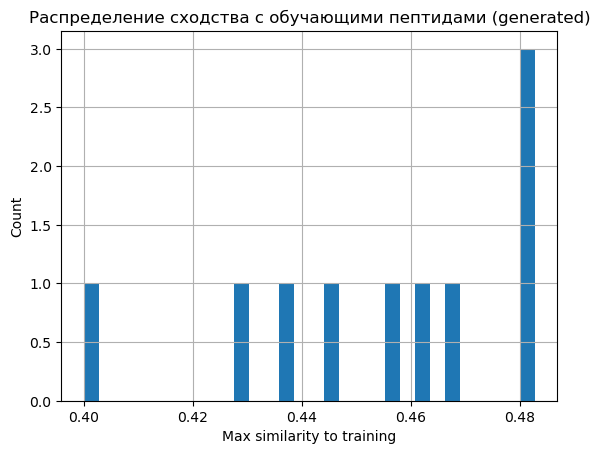

In [7]:
df_gen   = results_to_df(generated_results, origin_label="generated")

plt.figure()
df_gen["max_similarity_to_training"].hist(bins=30)
plt.xlabel("Max similarity to training")
plt.ylabel("Count")
plt.title("Распределение сходства с обучающими пептидами (generated)")
plt.show()

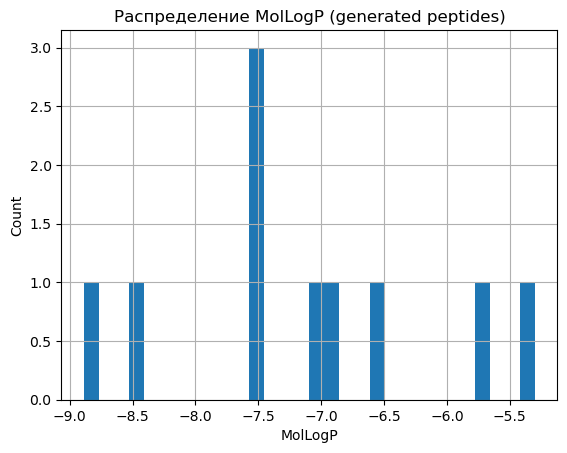

In [8]:
plt.figure()
df_gen["MolLogP"].hist(bins=30)
plt.xlabel("MolLogP")
plt.ylabel("Count")
plt.title("Распределение MolLogP (generated peptides)")
plt.show()

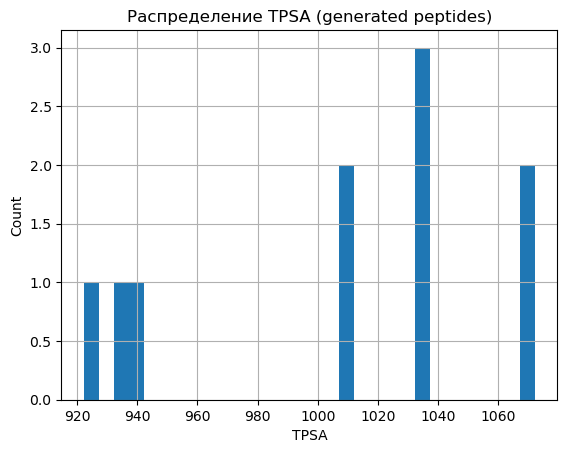

In [9]:
plt.figure()
df_gen["TPSA"].hist(bins=30)
plt.xlabel("TPSA")
plt.ylabel("Count")
plt.title("Распределение TPSA (generated peptides)")
plt.show()

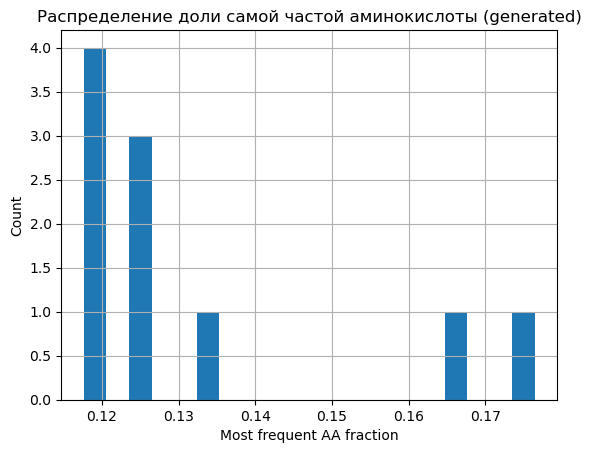

In [10]:
plt.figure()
df_gen["most_freq_fraction"].hist(bins=20)
plt.xlabel("Most frequent AA fraction")
plt.ylabel("Count")
plt.title("Распределение доли самой частой аминокислоты (generated)")
plt.show()